# Exercise 4: Multi-Class Classification
Neural Network Classification - Module 3

This exercise covers:
- Creating multi-class data with make_blobs
- Building multi-class models
- Using CrossEntropyLoss
- Converting logits with softmax
- Using argmax for predictions

Learning Mottos:
- If in doubt, run the code!
- Experiment, experiment, experiment!
- Visualize, visualize, visualize!

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

## Part 1: Creating make_blobs Dataset

In [3]:
n_samples = 1000
n_classes = 4

X, y = make_blobs(
    n_samples=n_samples,
    n_features=2,
    centers=n_classes,
    cluster_std=1.5,
    random_state=42
)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Number of classes: {len(set(y))}")

for class_id in range(n_classes):
    print(f"  Class {class_id}: {sum(y == class_id)} samples")

X shape: (1000, 2)
y shape: (1000,)
Number of classes: 4
  Class 0: 250 samples
  Class 1: 250 samples
  Class 2: 250 samples
  Class 3: 250 samples


## Part 2: Visualizing the Data

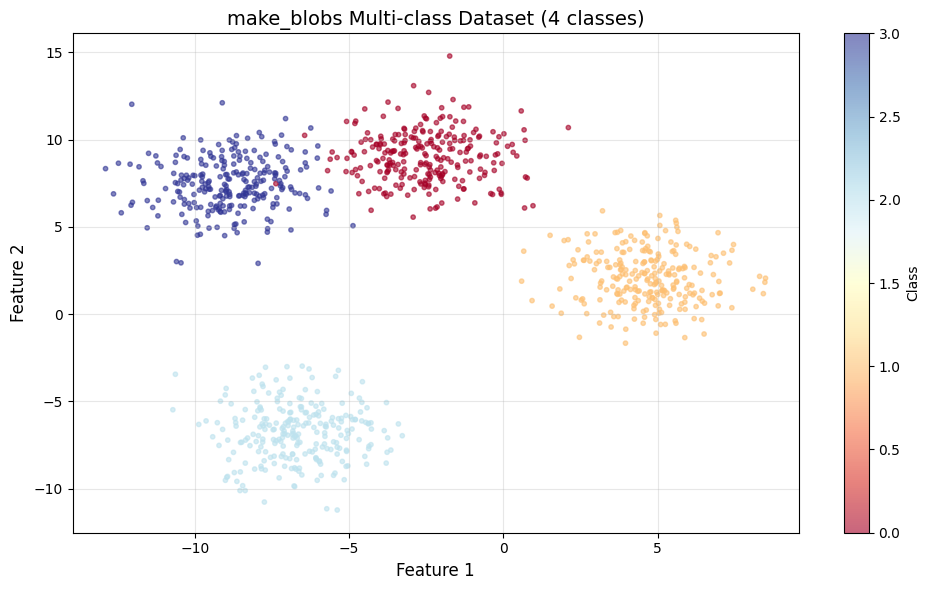

Visualization created!
Motto: Visualize, visualize, visualize!


In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', s=10, alpha=0.6)
plt.title(f'make_blobs Multi-class Dataset ({n_classes} classes)', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.colorbar(label='Class')
plt.tight_layout()
plt.show()

print("Visualization created!")
print("Motto: Visualize, visualize, visualize!")

## Part 3: Train/Test Split and Conversion

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

Training size: 800
Test size: 200


In [6]:
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\nUsing device: {device}")


Using device: cpu


In [8]:
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

print(f"\nTensor shapes:")
print(f"X_train: {X_train.shape}, dtype: {X_train.dtype}")
print(f"y_train: {y_train.shape}, dtype: {y_train.dtype}")
print(f"X_test: {X_test.shape}, dtype: {X_test.dtype}")
print(f"y_test: {y_test.shape}, dtype: {y_test.dtype}")


Tensor shapes:
X_train: torch.Size([800, 2]), dtype: torch.float32
y_train: torch.Size([800]), dtype: torch.int64
X_test: torch.Size([200, 2]), dtype: torch.float32
y_test: torch.Size([200]), dtype: torch.int64


## Part 4: Building Multi-Class Model

In [9]:
class BlobModel(nn.Module):
    """Multi-class classifier"""
    def __init__(self, input_size=2, hidden_size=16, num_classes=4):
        super(BlobModel, self).__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes)
            # Note: No softmax here (output is logits)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [10]:
model = BlobModel(input_size=2, hidden_size=16, num_classes=n_classes)
model = model.to(device)

print("BlobModel (Multi-class):")
print(model)

BlobModel (Multi-class):
BlobModel(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=4, bias=True)
  )
)


In [11]:
total_params = sum(p.numel() for p in model.parameters())
print(f"\nTotal parameters: {total_params:,}")


Total parameters: 116


## Part 5: Loss Function and Optimizer

In [12]:
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

print(f"Loss function: CrossEntropyLoss()")
print(f"Optimizer: Adam (lr=0.01)")

print("\nKey differences from binary:")
print("  - Binary: BCEWithLogitsLoss, y is FloatTensor with shape [N, 1]")
print("  - Multi-class: CrossEntropyLoss, y is LongTensor with shape [N]")

Loss function: CrossEntropyLoss()
Optimizer: Adam (lr=0.01)

Key differences from binary:
  - Binary: BCEWithLogitsLoss, y is FloatTensor with shape [N, 1]
  - Multi-class: CrossEntropyLoss, y is LongTensor with shape [N]


## Part 6: Training Loop

In [13]:
epochs = 100
train_losses = []
train_accuracies = []

model.train()
for epoch in range(epochs):
    # Forward pass
    y_logits = model(X_train)

    # Calculate loss
    loss = criterion(y_logits, y_train)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Track metrics
    train_losses.append(loss.item())
    with torch.no_grad():
        y_pred = torch.argmax(y_logits, dim=1)
        accuracy = (y_pred == y_train).float().mean()
        train_accuracies.append(accuracy.item())

    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Acc: {accuracy.item()*100:.2f}%')

print("\nTraining complete!")

Epoch [10/100], Loss: 0.4020, Acc: 83.63%
Epoch [20/100], Loss: 0.1678, Acc: 99.25%
Epoch [30/100], Loss: 0.0880, Acc: 98.50%
Epoch [40/100], Loss: 0.0564, Acc: 99.12%
Epoch [50/100], Loss: 0.0426, Acc: 99.12%
Epoch [60/100], Loss: 0.0366, Acc: 99.25%
Epoch [70/100], Loss: 0.0331, Acc: 99.25%
Epoch [80/100], Loss: 0.0307, Acc: 99.25%
Epoch [90/100], Loss: 0.0288, Acc: 99.25%
Epoch [100/100], Loss: 0.0275, Acc: 99.25%

Training complete!


## Part 7: The Logits → Softmax → Argmax Pipeline

In [14]:
model.eval()
with torch.inference_mode():
    test_logits = model(X_test)

    # Convert to probabilities using softmax
    test_probs = torch.softmax(test_logits, dim=1)

    # Convert to labels using argmax
    test_preds = torch.argmax(test_probs, dim=1)

In [15]:
print("\nFirst 3 predictions:")
for i in range(3):
    print(f"\nSample {i+1}:")
    print(f"  Logits: {test_logits[i].cpu().numpy()}")
    print(f"  Probabilities: {test_probs[i].cpu().numpy()}")
    print(f"  Predicted: {test_preds[i].item()}, Actual: {y_test[i].item()}")


First 3 predictions:

Sample 1:
  Logits: [-5.682291  -4.385443   5.1938987 -3.7657666]
  Probabilities: [1.8898902e-05 6.9127462e-05 9.9978346e-01 1.2846143e-04]
  Predicted: 2, Actual: 2

Sample 2:
  Logits: [ 0.61010814  9.1367655  -5.4092436  -8.655635  ]
  Probabilities: [1.9807681e-04 9.9980146e-01 4.8157318e-07 1.8740124e-08]
  Predicted: 1, Actual: 1

Sample 3:
  Logits: [ -4.5113225 -11.180925   -5.722313    2.003333 ]
  Probabilities: [1.4787200e-03 1.8763515e-06 4.4051374e-04 9.9807894e-01]
  Predicted: 3, Actual: 3


In [16]:
test_accuracy = (test_preds == y_test).float().mean()
print(f"\nTest Accuracy: {test_accuracy.item()*100:.2f}%")


Test Accuracy: 99.50%


## Part 8: Decision Boundary Visualization

In [17]:
def plot_multi_class_decision_boundary(model, X, y, title):
    """Plot decision boundary for multi-class model"""
    model.eval()

    # Create meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    # Make predictions on meshgrid
    mesh = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]).to(device)
    with torch.inference_mode():
        Z = torch.argmax(model(mesh), dim=1).reshape(xx.shape)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z.cpu().numpy(), alpha=0.3, cmap='RdYlBu')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='RdYlBu', edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.colorbar(label='Class')
    plt.tight_layout()
    plt.show()

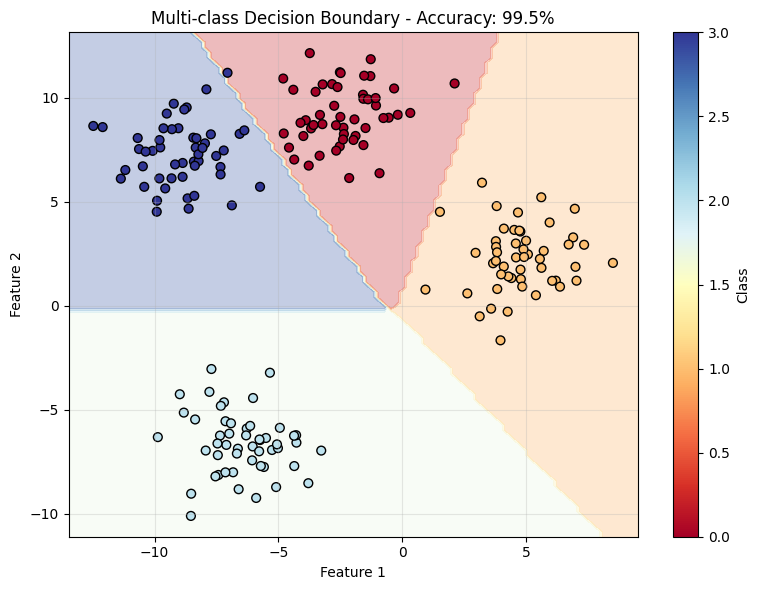

In [18]:
X_test_np = X_test.cpu().numpy()
y_test_np = y_test.cpu().numpy()

plot_multi_class_decision_boundary(
    model, X_test_np, y_test_np,
    f'Multi-class Decision Boundary - Accuracy: {test_accuracy.item()*100:.1f}%'
)

## Part 9: Per-Class Accuracy

In [19]:
for class_id in range(n_classes):
    class_mask = y_test == class_id
    class_acc = (test_preds[class_mask] == y_test[class_mask]).float().mean()
    print(f"Class {class_id} Accuracy: {class_acc.item()*100:.2f}%")

Class 0 Accuracy: 100.00%
Class 1 Accuracy: 100.00%
Class 2 Accuracy: 100.00%
Class 3 Accuracy: 98.00%


## Exercises

**Exercise 1: Vary number of classes**

In [20]:
n_classes_list = [2, 3, 4, 5]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()

for n_classes in n_classes_list:
    print(f"\nTraining for {n_classes} classes:")

    X, y = make_blobs(
        n_samples=1000,
        n_features=2,
        centers=n_classes,
        cluster_std=1.5,
        random_state=42
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    X_train = torch.FloatTensor(X_train)
    y_train = torch.LongTensor(y_train)
    X_test = torch.FloatTensor(X_test)
    y_test = torch.LongTensor(y_test)

    X_train, y_train = X_train.to(device), y_train.to(device)
    X_test, y_test = X_test.to(device), y_test.to(device)

    model = BlobModel(
        input_size=2, hidden_size=16, num_classes=n_classes
    ).to(device)

    optimizer = optim.Adam(model.parameters(), lr=0.01)

    epochs = 100
    train_losses = []
    train_accuracies = []

    model.train()
    for epoch in range(epochs):
        # Forward pass
        y_logits = model(X_train)

        # Calculate loss
        loss = criterion(y_logits, y_train)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track metrics
        train_losses.append(loss.item())
        with torch.no_grad():
            y_pred = torch.argmax(y_logits, dim=1)
            accuracy = (y_pred == y_train).float().mean()
            train_accuracies.append(accuracy.item())

        # Print progress
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Acc: {accuracy.item()*100:.2f}%')

    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test)
        test_probs = torch.softmax(test_logits, dim=1)
        test_preds = torch.argmax(test_probs, dim=1)

    test_accuracy = (test_preds == y_test).float().mean()
    print(f"\nTest Accuracy: {test_accuracy.item()*100:.2f}%")

    print("-" * 80)


Training for 2 classes:
Epoch [10/100], Loss: 0.0522, Acc: 99.37%
Epoch [20/100], Loss: 0.0161, Acc: 99.50%
Epoch [30/100], Loss: 0.0099, Acc: 99.75%
Epoch [40/100], Loss: 0.0075, Acc: 99.75%
Epoch [50/100], Loss: 0.0060, Acc: 99.75%
Epoch [60/100], Loss: 0.0046, Acc: 100.00%
Epoch [70/100], Loss: 0.0038, Acc: 99.87%
Epoch [80/100], Loss: 0.0032, Acc: 100.00%
Epoch [90/100], Loss: 0.0028, Acc: 100.00%
Epoch [100/100], Loss: 0.0025, Acc: 100.00%

Test Accuracy: 100.00%
--------------------------------------------------------------------------------

Training for 3 classes:
Epoch [10/100], Loss: 0.2218, Acc: 99.87%
Epoch [20/100], Loss: 0.0491, Acc: 100.00%
Epoch [30/100], Loss: 0.0222, Acc: 100.00%
Epoch [40/100], Loss: 0.0136, Acc: 100.00%
Epoch [50/100], Loss: 0.0101, Acc: 100.00%
Epoch [60/100], Loss: 0.0083, Acc: 100.00%
Epoch [70/100], Loss: 0.0071, Acc: 100.00%
Epoch [80/100], Loss: 0.0062, Acc: 100.00%
Epoch [90/100], Loss: 0.0055, Acc: 100.00%
Epoch [100/100], Loss: 0.0050, Acc

**Exercise 2: Change cluster standard deviation**

In [21]:
cluster_list = [0.5, 1.5, 3.0]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()

for cluster_std in cluster_list:
    print(f"\nTraining for {n_classes} classes:")

    X, y = make_blobs(
        n_samples=1000,
        n_features=2,
        centers=4,
        cluster_std=cluster_std,
        random_state=42
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    X_train = torch.FloatTensor(X_train)
    y_train = torch.LongTensor(y_train)
    X_test = torch.FloatTensor(X_test)
    y_test = torch.LongTensor(y_test)

    X_train, y_train = X_train.to(device), y_train.to(device)
    X_test, y_test = X_test.to(device), y_test.to(device)

    model = BlobModel(
        input_size=2, hidden_size=8, num_classes=4
    ).to(device)

    optimizer = optim.Adam(model.parameters(), lr=0.01)

    epochs = 100
    train_losses = []
    train_accuracies = []

    model.train()
    for epoch in range(epochs):
        # Forward pass
        y_logits = model(X_train)

        # Calculate loss
        loss = criterion(y_logits, y_train)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track metrics
        train_losses.append(loss.item())
        with torch.no_grad():
            y_pred = torch.argmax(y_logits, dim=1)
            accuracy = (y_pred == y_train).float().mean()
            train_accuracies.append(accuracy.item())

        # Print progress
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Acc: {accuracy.item()*100:.2f}%')

    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test)
        test_probs = torch.softmax(test_logits, dim=1)
        test_preds = torch.argmax(test_probs, dim=1)

    test_accuracy = (test_preds == y_test).float().mean()
    print(f"\nTest Accuracy: {test_accuracy.item()*100:.2f}%")

    print("-" * 80)


Training for 5 classes:
Epoch [10/100], Loss: 0.8362, Acc: 75.00%
Epoch [20/100], Loss: 0.4051, Acc: 100.00%
Epoch [30/100], Loss: 0.1370, Acc: 100.00%
Epoch [40/100], Loss: 0.0456, Acc: 100.00%
Epoch [50/100], Loss: 0.0206, Acc: 100.00%
Epoch [60/100], Loss: 0.0121, Acc: 100.00%
Epoch [70/100], Loss: 0.0086, Acc: 100.00%
Epoch [80/100], Loss: 0.0067, Acc: 100.00%
Epoch [90/100], Loss: 0.0056, Acc: 100.00%
Epoch [100/100], Loss: 0.0048, Acc: 100.00%

Test Accuracy: 100.00%
--------------------------------------------------------------------------------

Training for 5 classes:
Epoch [10/100], Loss: 0.9070, Acc: 51.00%
Epoch [20/100], Loss: 0.3373, Acc: 98.37%
Epoch [30/100], Loss: 0.1619, Acc: 98.87%
Epoch [40/100], Loss: 0.0935, Acc: 99.12%
Epoch [50/100], Loss: 0.0648, Acc: 99.12%
Epoch [60/100], Loss: 0.0514, Acc: 99.12%
Epoch [70/100], Loss: 0.0441, Acc: 99.12%
Epoch [80/100], Loss: 0.0395, Acc: 99.12%
Epoch [90/100], Loss: 0.0364, Acc: 99.12%
Epoch [100/100], Loss: 0.0342, Acc: 9

**Exercise 3: Compare binary vs multi-class**

In [42]:
# How is binary different from multi-class?
"""
Binary: only 2 classes (0/1), output 1 neuron.
Multi-class: >= 3 classes, output multiple neurons.
"""

# What's different about the loss function?
"""
Binary: BCEWithLogitsLoss, y is FloatTensor with shape [N, 1]
Multi-class: CrossEntropyLoss, y is LongTensor with shape [N]

"""

# What's different about the output activation?
"""
Binary: Sigmoid, (or none if using BCEWithLogitsLoss)
Multi-class: No activation (output logits), only apply softmax when probabilities are needed for inference.
"""

'\nBinary: Sigmoid, (or none if using BCEWithLogitsLoss)\nMulti-class: No activation (output logits), only apply softmax when probabilities are needed for inference.\n'

**Exercise 4: Experiment with model size**

In [23]:
hidden_sizes = [8, 16, 32]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()

for hidden_size in hidden_sizes:
    print(f"\nTraining for {n_classes} classes:")

    X, y = make_blobs(
        n_samples=1000,
        n_features=2,
        centers=4,
        cluster_std=1.5,
        random_state=42
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    X_train = torch.FloatTensor(X_train)
    y_train = torch.LongTensor(y_train)
    X_test = torch.FloatTensor(X_test)
    y_test = torch.LongTensor(y_test)

    X_train, y_train = X_train.to(device), y_train.to(device)
    X_test, y_test = X_test.to(device), y_test.to(device)

    model = BlobModel(
        input_size=2, hidden_size=hidden_size, num_classes=4
    ).to(device)

    optimizer = optim.Adam(model.parameters(), lr=0.01)

    epochs = 100
    train_losses = []
    train_accuracies = []

    model.train()
    for epoch in range(epochs):
        # Forward pass
        y_logits = model(X_train)

        # Calculate loss
        loss = criterion(y_logits, y_train)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track metrics
        train_losses.append(loss.item())
        with torch.no_grad():
            y_pred = torch.argmax(y_logits, dim=1)
            accuracy = (y_pred == y_train).float().mean()
            train_accuracies.append(accuracy.item())

        # Print progress
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Acc: {accuracy.item()*100:.2f}%')

    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test)
        test_probs = torch.softmax(test_logits, dim=1)
        test_preds = torch.argmax(test_probs, dim=1)

    test_accuracy = (test_preds == y_test).float().mean()
    print(f"\nTest Accuracy: {test_accuracy.item()*100:.2f}%")

    print("-" * 80)


Training for 5 classes:
Epoch [10/100], Loss: 0.6676, Acc: 77.38%
Epoch [20/100], Loss: 0.2542, Acc: 99.12%
Epoch [30/100], Loss: 0.1361, Acc: 99.25%
Epoch [40/100], Loss: 0.0860, Acc: 99.25%
Epoch [50/100], Loss: 0.0639, Acc: 99.12%
Epoch [60/100], Loss: 0.0519, Acc: 99.12%
Epoch [70/100], Loss: 0.0444, Acc: 99.12%
Epoch [80/100], Loss: 0.0398, Acc: 99.25%
Epoch [90/100], Loss: 0.0366, Acc: 99.25%
Epoch [100/100], Loss: 0.0344, Acc: 99.25%

Test Accuracy: 99.50%
--------------------------------------------------------------------------------

Training for 5 classes:
Epoch [10/100], Loss: 0.5201, Acc: 93.37%
Epoch [20/100], Loss: 0.1757, Acc: 98.62%
Epoch [30/100], Loss: 0.0946, Acc: 99.00%
Epoch [40/100], Loss: 0.0689, Acc: 99.00%
Epoch [50/100], Loss: 0.0553, Acc: 99.12%
Epoch [60/100], Loss: 0.0472, Acc: 99.12%
Epoch [70/100], Loss: 0.0426, Acc: 99.00%
Epoch [80/100], Loss: 0.0396, Acc: 99.12%
Epoch [90/100], Loss: 0.0373, Acc: 99.12%
Epoch [100/100], Loss: 0.0355, Acc: 99.12%

Tes

**Exercise 5: Add more hidden layers**

In [35]:
def create_dynamic_model(input_size, hidden_sizes, num_classes):
    layers = []
    prev_size = input_size

    # Tạo các hidden layer
    for h_size in hidden_sizes:
        layers.append(nn.Linear(prev_size, h_size))
        layers.append(nn.ReLU())
        prev_size = h_size  # Cập nhật kích thước cho layer tiếp theo

    # Output layer (không có ReLU cuối)
    layers.append(nn.Linear(prev_size, num_classes))

    return nn.Sequential(*layers)

In [25]:
hidden_configs = [
    [8],              # 1 hidden layer
    [8, 16],          # 2 hidden layers
    [8, 16, 32],      # 3 hidden layers
    [16, 32, 16, 8],  # 4 hidden layers
]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()

In [36]:
class BlobModel_Ex5(nn.Module):
    def __init__(self, input_size=2, hidden_sizes=[16], num_classes=4):
        super().__init__()
        layers = [nn.Linear(input_size, hidden_sizes[0]), nn.ReLU()]
        for i in range(len(hidden_sizes) - 1):
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_sizes[-1], num_classes))
        self.layer_stack = nn.Sequential(*layers)

    def forward(self, x):
        return self.layer_stack(x)

In [39]:
for hidden_size_ in hidden_configs:
    print(f"\nTraining for {n_classes} classes:")
    print(f"----Hidden Sizes: {hidden_size_}")

    X, y = make_blobs(
        n_samples=1000,
        n_features=2,
        centers=4,
        cluster_std=1.5,
        random_state=42
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    X_train = torch.FloatTensor(X_train)
    y_train = torch.LongTensor(y_train)
    X_test = torch.FloatTensor(X_test)
    y_test = torch.LongTensor(y_test)

    X_train, y_train = X_train.to(device), y_train.to(device)
    X_test, y_test = X_test.to(device), y_test.to(device)

    model = BlobModel_Ex5(
        input_size=2,
        hidden_sizes=hidden_size_,
        num_classes=4
    ).to(device)

    print(f"----Model architecture:\n{model}")

    optimizer = optim.Adam(model.parameters(), lr=0.01)

    epochs = 100
    train_losses = []
    train_accuracies = []

    model.train()
    for epoch in range(epochs):
        # Forward pass
        y_logits = model(X_train)

        # Calculate loss
        loss = criterion(y_logits, y_train)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track metrics
        train_losses.append(loss.item())
        with torch.no_grad():
            y_pred = torch.argmax(y_logits, dim=1)
            accuracy = (y_pred == y_train).float().mean()
            train_accuracies.append(accuracy.item())

        # Print progress
        if (epoch + 1) % 10 == 0:
            print(f'-------Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Acc: {accuracy.item()*100:.2f}%')

    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test)
        test_probs = torch.softmax(test_logits, dim=1)
        test_preds = torch.argmax(test_probs, dim=1)

    test_accuracy = (test_preds == y_test).float().mean()
    print(f"\n----Test Accuracy: {test_accuracy.item()*100:.2f}%")

    print("-" * 80)


Training for 5 classes:
----Hidden Sizes: [8]
----Model architecture:
BlobModel_Ex5(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)
-------Epoch [10/100], Loss: 0.9179, Acc: 70.38%
-------Epoch [20/100], Loss: 0.6369, Acc: 77.25%
-------Epoch [30/100], Loss: 0.4517, Acc: 85.25%
-------Epoch [40/100], Loss: 0.3202, Acc: 89.00%
-------Epoch [50/100], Loss: 0.2351, Acc: 97.00%
-------Epoch [60/100], Loss: 0.1726, Acc: 99.00%
-------Epoch [70/100], Loss: 0.1262, Acc: 99.12%
-------Epoch [80/100], Loss: 0.0942, Acc: 99.12%
-------Epoch [90/100], Loss: 0.0739, Acc: 99.12%
-------Epoch [100/100], Loss: 0.0612, Acc: 99.12%

----Test Accuracy: 99.50%
--------------------------------------------------------------------------------

Training for 5 classes:
----Hidden Sizes: [8, 16]
----Model architecture:
BlobModel_Ex5(
  (layer_stack): Sequential(
    (0): Linear(in_features=2